## Exaustiva

Obs.: Solução otima!

In [ ]:
%%writefile programa.cpp 

#include<iostream>
#include<vector>
#include<algorithm>
using namespace std;

struct item {
    int id;
    double peso;
    double valor;
};

// usados: conseguir controlar depois quais itens que eu coloquei na mochila

double knapsack(int W, vector<item> items, vector<item>& usados, vector<item>& melhor) {
    double peso = 0.0;
    double valor = 0.0;
    double sem_i = 0.0, com_i = 0.0; // sem_i = sem itens; com_i = com itens
    vector<item> items2 = items;
    if(items.empty() || W == 0) {
        return 0;
    }
    // dois braços da recursao:
    if(items[0].peso <= W) {
        usados.push_back(items[0]);
        valor = items[0].valor;
        peso = items[0].peso;
        items.erase(items.begin());
        com_i = knapsack(W - peso, items, usados, melhor);
    }
    items2.erase(items2.begin());
    sem_i = knapsack(W, items2, usados, melhor);

    double valor_atual = 0.0, valor_melhor = 0.0;
    for(auto& el: usados) {
        valor_atual += el.valor;
    }
    for(auto& el: melhor) {
        valor_melhor += el.valor; // quanto que valor esse melhor
    }
    if (valor_atual > valor_melhor) {
        melhor = usados;
    }
    usados.clear();
    return max(sem_i, valor + com_i);

}

int main() {
    int n = 0;
    int W = 0;
    vector<item> mochila;
    cin >> n >> W;
    vector<item> items, usados, melhor;
    items.reserve(n);
    usados.reserve(n);
    double peso, valor;
    for(int i = 0; i < n; i++) {
        cin >> peso;
        cin >> valor;
        items.push_back({i, peso, valor});
    }
    cout << "Resultado " << knapsack(W, items, usados, melhor) << "\n"; 
    for (auto& el: melhor) {
        cout << el.id << " ";
    }
    return 0;
}

Overwriting programa.cpp


In [ ]:
!g++ -o programa programa.cpp

In [ ]:
!./programa < "in1.txt"

Resultado 266
5 6 7 8 9 

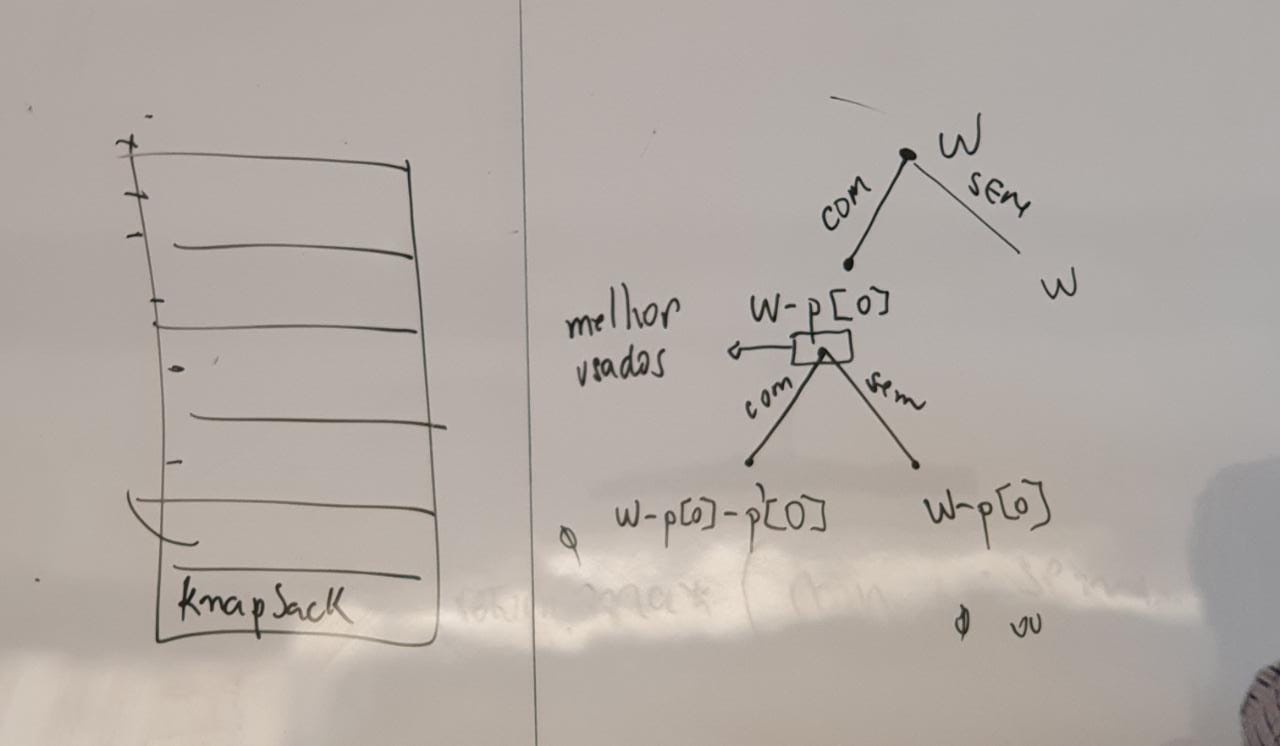